In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
bike_rentals = pd.read_csv('bike_rentals.csv')
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,01/01/2011,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3,01/01/2011,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4,01/01/2011,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,01/01/2011,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6,01/01/2011,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7,01/01/2011,1.0,0.0,1.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0
7,8,01/01/2011,1.0,0.0,1.0,7.0,0.0,6.0,0.0,1.0,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0
8,9,01/01/2011,1.0,0.0,1.0,8.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10,01/01/2011,1.0,0.0,1.0,9.0,0.0,6.0,0.0,1.0,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0


Visualising the data. Count ('cnt') is the variable we will be predicting so let's have a look at it's distribution:

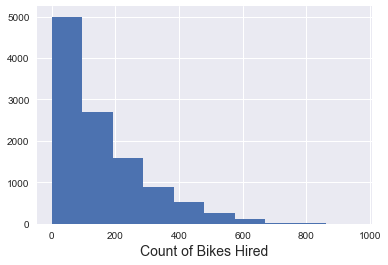

In [62]:
plt.hist(bike_rentals['cnt'])
plt.xlabel('Count of Bikes Hired', fontsize = 14)

In [25]:
bike_rentals['cnt'].describe()

count    11105.000000
mean       151.238991
std        142.590822
min          1.000000
25%         33.000000
50%        114.000000
75%        222.000000
max        957.000000
Name: cnt, dtype: float64

Given the 'right-skewedness' of the data, it may be a good idea to create a new feature which splits the count of bikes hired in particular hour into four buckets:

In [31]:
def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 4
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    else:
        return ('NaN')

In [32]:
hourly_rentals = bike_rentals['hr']
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,01/01/2011,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,4
1,2,01/01/2011,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,4
2,3,01/01/2011,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,4
3,4,01/01/2011,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,4
4,5,01/01/2011,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,4
5,6,01/01/2011,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,4
6,7,01/01/2011,1.0,0.0,1.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0,1
7,8,01/01/2011,1.0,0.0,1.0,7.0,0.0,6.0,0.0,1.0,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0,1
8,9,01/01/2011,1.0,0.0,1.0,8.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0,1
9,10,01/01/2011,1.0,0.0,1.0,9.0,0.0,6.0,0.0,1.0,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0,1


Investigating ['cnt'] correlations with other variables in the dataset:

In [26]:
corrmat = bike_rentals.corr()
cnt_corr = bike_rentals.corr()['cnt']

In [27]:
cnt_corr

season        0.133491
yr            0.097877
mnth          0.096279
hr            0.399823
holiday      -0.035837
weekday       0.007185
workingday    0.032437
weathersit   -0.146886
temp          0.392201
atemp         0.390680
hum          -0.288941
windspeed     0.096805
casual        0.692944
registered    0.968678
cnt           1.000000
Name: cnt, dtype: float64

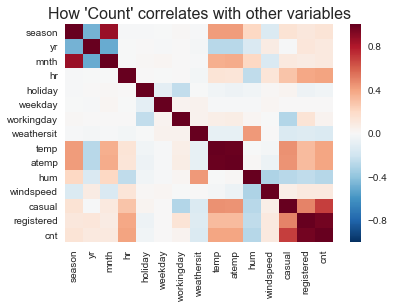

In [65]:
sns.heatmap(corrmat)
plt.title("How 'Count' correlates with other variables", fontsize = 16)

We don't see any strong correlations. 'Casual' and 'registered' are subcategories of the 'cnt' column, which leak information on the target column (and hence will be dropped). 'dteday' column is the date, and wont be used either (other seasonal information is available). 

In [33]:
columns = bike_rentals.columns.drop(['cnt', 'casual', 'dteday', 'registered'])
columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'time_label'],
      dtype='object')

To apply machine learning, data is split into a training set and a test set. The error metric used will be mean squared error (MSE), which is suited to continuous data.

In [34]:
cutoff = bike_rentals.shape[0] * 0.8
train = bike_rentals.sample(frac = 0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [36]:
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predictions = lr.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

11169.366112297554

For use in a practical setting, this is an unacceptably high error, and the linear model probably isn't the best for this dataset. A decision tree will perform better in a dataset where many of the input variables are categorical. Starting with a single tree model:

In [39]:
tree = DecisionTreeRegressor(min_samples_leaf = 5)

In [38]:
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

1897.4821962218821

The decision tree model reduced our error signficantly, and this may even be improved by experimenting with the min_samples_leaf (minimum allowable samples to be a leaf node) parameter. A random forest is a good next step, and also minimises the risk of overfitting:

In [48]:
forest = RandomForestRegressor(min_samples_leaf = 2, n_estimators = 10)
forest.fit(train[columns], train['cnt'])
predictions = forest.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

1332.0358085906785

The random forest algorithm is more accurate than decision trees and avoids overfitting. In a real-world setting, it would be advisable to tweak parameters such as min_samples_leaf and n_estimators. One way of doing this quickly would be to use a for loop for each and see how high their error is:

In [53]:
mse_leaf=[]
for i in range(1, 10):
    tree = RandomForestRegressor(min_samples_leaf=i, n_estimators=10)
    tree.fit(train[columns], train['cnt'])
    predictions = tree.predict(test[columns])

    mse = mean_squared_error(test['cnt'], predictions)
    mse_leaf.append(mse)
mse_leaf

[1407.1350742908601,
 1367.6019608095246,
 1400.1738012119008,
 1518.5484647747219,
 1575.35681388022,
 1614.8935460398734,
 1681.671028636759,
 1692.2142054269257,
 1806.5704008913317]

Choose 2 for min_samples_leaf. A similar process can be followed for n_estimators:

In [55]:
n_trees = [2,5,10,20,50,100,200,500]
mse_trees=[]
for i in n_trees:
    tree = RandomForestRegressor(min_samples_leaf=1, n_estimators=i)
    tree.fit(train[columns], train['cnt'])
    predictions = tree.predict(test[columns])

    mse = mean_squared_error(test['cnt'], predictions)
    mse_trees.append(mse)
mse_trees

[2004.8823728050427,
 1623.5883475911753,
 1364.4310400720397,
 1285.5129795137327,
 1232.8710090950024,
 1225.4796576767221,
 1214.6396310108059,
 1219.897258303467]

It's obvious that increasing n_estimators improves the error, but also causes the algorithm to run much slower, and is subject to the law of diminishing returns. This might not be a big deal with a dataset of this size, but the problem becomes more real with larger studies. In this case, the optimal value is probably n_estimators = 20.